In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
class seyedCV:
    def __init__(self, image_path):
        img = Image.open(image_path)

        img_rgb = img.convert('RGB')
        self.image = img_rgb
        self.address = image_path


    def reload(self):
        img = cv2.imread(self.address)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.image = img_rgb


    def load(self,image):
        self.image = cv2.imread(image)
        self.address = image


    def show_with_origin(self,name):
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(v.image)
        img = cv2.imread(self.address)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[1].imshow(img_rgb)

        ax[0].set_title('processed')
        ax[1].set_title('Origin')
        plt.savefig(name+'.png')

        plt.show()
    def show(self):
        plt.imshow(self.image)
        plt.show()

    def save(self,name):
        img = Image.fromarray(self.image)
        img.save(name+".png")

    def resize(self, sx, sy):

        h, w = self.image.shape[:2]


        y, x = np.mgrid[0:sy*h:1, 0:sx*w:1]


        x = x / sx
        y = y / sy


        x = np.round(x).astype(int)
        y = np.round(y).astype(int)


        x = np.clip(x, 0, w-1)
        y = np.clip(y, 0, h-1)


        self.image = self.image[y, x]


    def rotate(self,theta):

        theta = np.deg2rad(theta)


        h, w = self.image.shape[:2]


        y, x = np.mgrid[0:h, 0:w]


        x = x - w/2
        y = y - h/2


        x_new = x * np.cos(theta) + y * np.sin(theta)
        y_new = -x * np.sin(theta) + y * np.cos(theta)


        x_new = x_new + w/2
        y_new = y_new + h/2

        x_new = np.round(x_new).astype(int)
        y_new = np.round(y_new).astype(int)


        x_new = np.clip(x_new, 0, w-1)
        y_new = np.clip(y_new, 0, h-1)


        self.image = self.image[y_new, x_new]

    def compress(self):

        img_array_compressed = self.image // 4 * 4


        img_compressed = Image.fromarray(img_array_compressed)



    def sobel_filter(self):
        self.convolve(np.array([[-1, -2, -1],
                                [ 0,  0,  0],
                                [ 1,  2,  1]]))

    def prewitt_filter(self):
        self.convolve(np.array([[-1, 0, 1],
                                  [-1, 0, 1],
                                  [-1, 0, 1]]))

    def sharpen_filter(self):
        self.convolve(np.array([[ 0, -1,  0],
                                [-1,  5, -1],
                                [ 0, -1,  0]]))

    def blur_filter(self):

        array = np.ones((5,5))
        averaging_filter = np.multiply(array, 1/25)
        self.convolve(averaging_filter)

    def smooth(self):
        self.convolve(np.array([[2,4,5,4,2],
                                [4,9,12,9,4],
                                [5,12,15,12,5],
                                [4,9,12,9,4],
                                [2,4,5,4,2]])/159)
    def invert_color(self):
        image = self.image

        for i in range(image.shape[1]):
            for j in range(image.shape[0]):
                self.image[j, i] = 255-self.image[j,i]

    def luminosity(self):
        image = self.image
        out = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

        for i in range(image.shape[1]):
            for j in range(image.shape[0]):
                out[j, i] = image[j, i, 0] * 0.2989 + image[j, i, 1] * 0.5870 + image[j, i, 2] * 0.1140

        self.image = out

    def color_balance(self,red,green,blue):
        image = self.image

        for i in range(image.shape[1]):
            for j in range(image.shape[0]):
                new_red = np.clip(image[j, i][0] * red, 0, 255)
                new_green = np.clip(image[j, i][1] * green, 0, 255)
                new_blue = np.clip(image[j, i][2] * blue, 0, 255)
                self.image[j, i] = np.array([new_red, new_green, new_blue])

    def convolve(self, filter):

        filter_x , filter_y = np.shape(filter)
        image = self.image


        filter = np.flipud(np.fliplr(filter))


        output = np.zeros_like(image)


        for i in range(image.shape[1]-filter_x+1):
            for j in range(image.shape[0]-filter_y+1):


                output[j, i ,0]=(filter * image[j: j+filter_y, i: i+filter_x, 0]).sum()
                output[j, i ,1]=(filter * image[j: j+filter_y, i: i+filter_x, 1]).sum()
                output[j, i ,2]=(filter * image[j: j+filter_y, i: i+filter_x, 2]).sum()

        self.image = output


In [47]:
v = seyedCV('image.jpg')

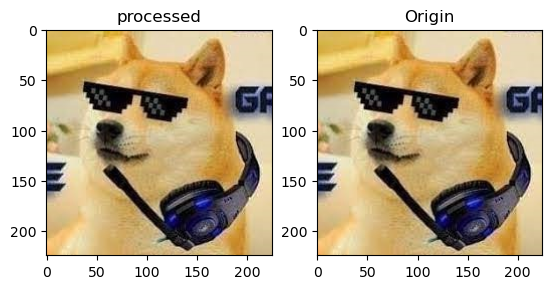

In [49]:
v.reload()
v.compress()
v.show_with_origin('../ans/compress')

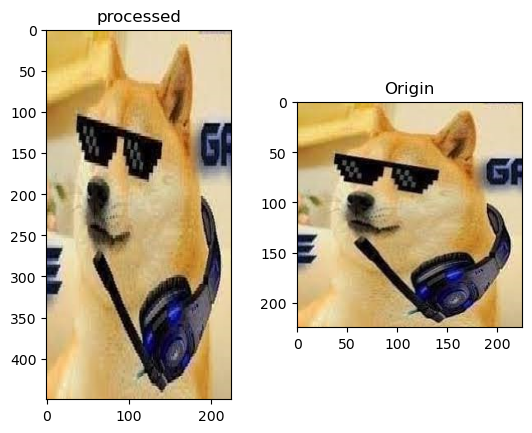

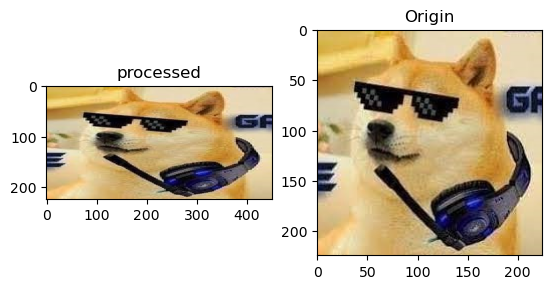

In [36]:
v.reload()
v.resize(1,2)
v.show_with_origin('../ans/resize12')
v.reload()
v.resize(2,1)
v.show_with_origin('../ans/resize21')

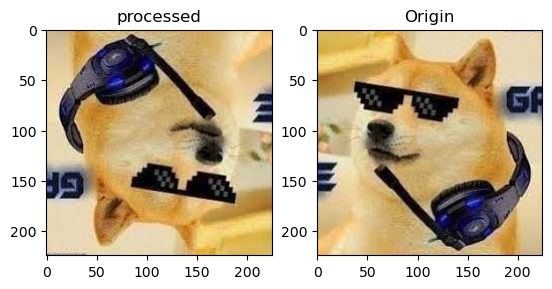

In [37]:
v.reload()
v.rotate(180)
v.show_with_origin('../ans/rotate')

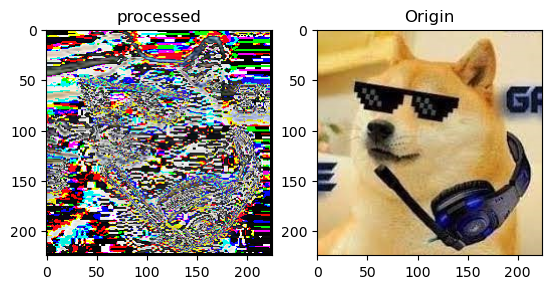

In [38]:
v.reload()
v.sobel_filter()
v.show_with_origin('../ans/sobel')

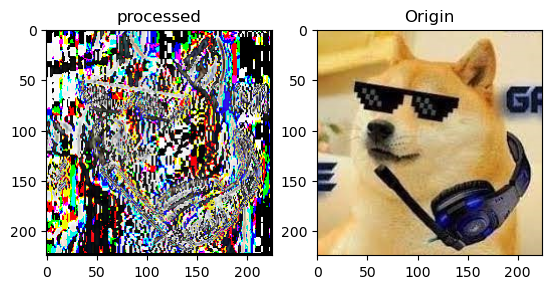

In [39]:
v.reload()
v.prewitt_filter()
v.show_with_origin('../ans/prewitt')

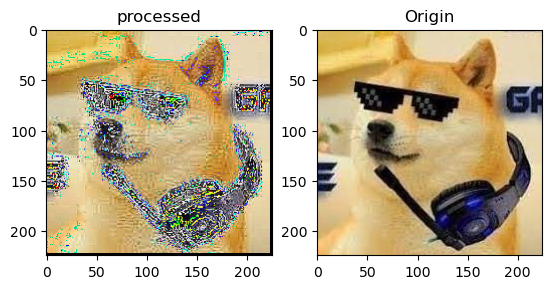

In [40]:
v.reload()
v.sharpen_filter()
v.show_with_origin('../ans/sharpen')

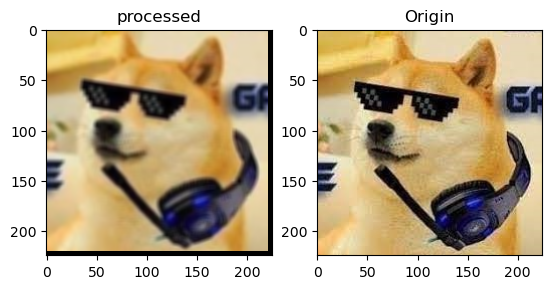

In [41]:
v.reload()
v.blur_filter()
v.show_with_origin('../ans/blur')

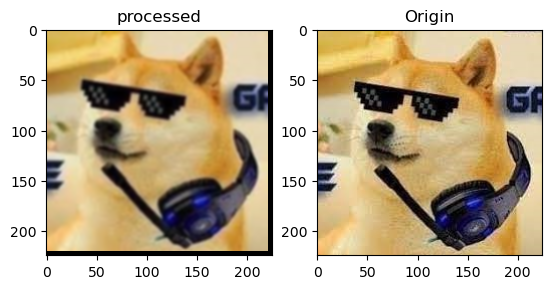

In [42]:
v.reload()
v.smooth()
v.show_with_origin('../ans/smooth')

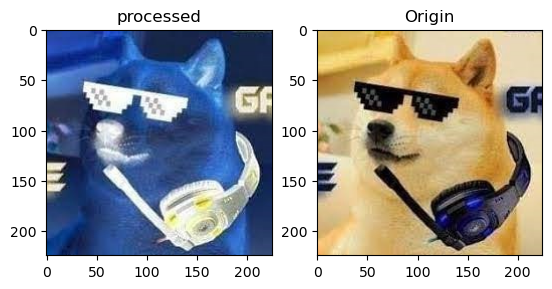

In [43]:
v.reload()
v.invert_color()
v.show_with_origin('../ans/invert')

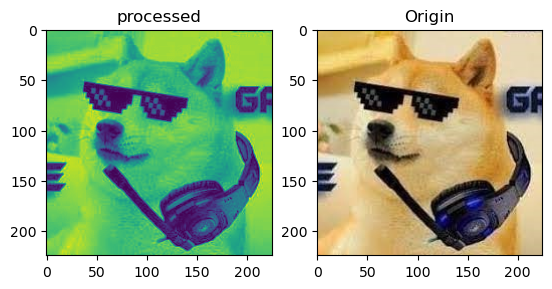

In [44]:
v.reload()
v.luminosity()
v.show_with_origin('../ans/luminosity')

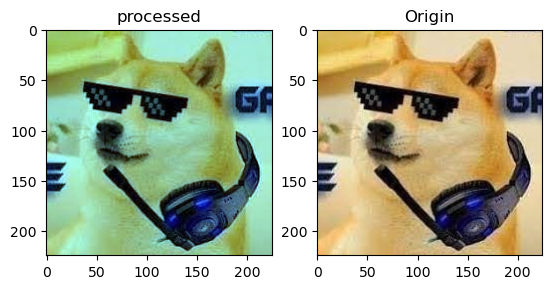

In [45]:
v.reload()
v.color_balance(0.7,1.1,1.2)
v.show_with_origin('../ans/balance')

# descriptions:

# 1. Resize Operation:
## Concept: Scaling Transformation
**Explanation**: The resize operation rescales the image by applying a scaling transformation. It achieves this by creating a grid of coordinates in the output image and applying the inverse transformation to these coordinates. The coordinates are divided by the scaling factors, resulting in a rescaled image. The rounding of coordinates ensures that the nearest pixel in the input image is obtained.
### matrix:

\begin{bmatrix}
sx & 0 \\
0 & sy \\
\end{bmatrix}

# 2. Rotate Operation:
## Concept: Rotation Transformation
**Explanation**: The rotate operation rotates the image by applying a rotation transformation. It begins by converting the rotation angle to radians. A grid of coordinates is then created in the output image. The coordinates are centered by subtracting the width and height of the image by 2. The inverse rotation transformation is applied to these coordinates using trigonometric functions. The shifted and rounded coordinates are then used to index the input image, resulting in a rotated image.
### matrix:

\begin{bmatrix}
cos($\theta$) & -sin($\theta$) \\
sin($\theta$) & cos($\theta$) \\
\end{bmatrix}

# 3. Sobel Filter Operation:
## Concept: Convolution
**Explanation**: The sobel_filter operation applies a convolution operation to the image using a specific filter. Convolution involves element-wise multiplication of the filter and the image, followed by summing the results. This operation is a linear transformation in linear algebra. The sobel_filter operation utilizes a 3x3 filter matrix to detect edges in the image.
### matrix:
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 0 \\
\end{bmatrix}
# 4. Prewitt Filter Operation:
## Concept: Convolution
**Explanation**: The prewitt_filter operation also applies a convolution operation to the image using a specific filter. Similar to the sobel_filter operation, it involves element-wise multiplication of the filter and the image, followed by summing the results. This operation is a linear transformation in linear algebra. The prewitt_filter operation utilizes a 3x3 filter matrix to detect edges in the image.
### matrix:
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{bmatrix}
# 5. Sharpen Filter Operation:
## Concept: Convolution
**Explanation**: The sharpen_filter operation applies a convolution operation to the image using a specific filter. It involves element-wise multiplication of the filter and the image, followed by summing the results. This operation is a linear transformation in linear algebra. The sharpen_filter operation utilizes a 3x3 filter matrix to enhance the sharpness of the image.
### matrix:
\begin{bmatrix}
0 & -1 & 0 \\
-1 & -5 & -1 \\
0 & -5 & 0 \\
\end{bmatrix}
# 6. Blur Filter Operation:
## Concept: Convolution
**Explanation**: The blur_filter operation applies a convolution operation to the image using an averaging filter. Similar to the previous operations, it involves element-wise multiplication of the filter and the image, followed by summing the results. This operation is a linear transformation in linear algebra. The blur_filter operation utilizes a 5x5 averaging filter matrix to blur the image.
### matrix:
\begin{bmatrix}
\frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} \\
\frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} \\
\frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} \\
\frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} \\
\frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} & \frac{1}{25} \\
\end{bmatrix}
# 7. Invert Color Operation:
## Concept: Linear Transformation
**Explanation**: The invert_color operation applies a linear transformation to each pixel of the image. It subtracts the pixel value from 255 to invert the color. This operation is a linear transformation in linear algebra.
### metrix: Please note that these are not matrices in the linear algebra sense, but rather operations applied to each pixel in the image.
```
R' = 255 - R
G' = 255 - G
B' = 255 - B
```
# 8. Luminosity Operation:
## Concept: Linear Transformation
**Explanation**: The luminosity operation applies a linear transformation to each pixel of the image. It calculates the luminosity value of each pixel using a weighted sum of the RGB values. This operation is a linear transformation in linear algebra.
### matrix:
\begin{bmatrix}
0.2989 & 0.5870 & 0.1140 \\
\end{bmatrix}
# 9. Color Balance Operation:
## Concept: Linear Transformation
**Explanation**: The color_balance operation applies a linear transformation to each pixel of the image. It multiplies the RGB values of each pixel by the specified color balance factors and clips the result to the valid range. This operation is a linear transformation in linear algebra.
### matrix:
\begin{bmatrix}
red scale & green scale & blue scale \\
\end{bmatrix}
# 10. Convolve Method:
## Concept: Convolution
**Explanation**: The convolve method applies a convolution operation to the image using a given filter. It involves element-wise multiplication of the filter and the image, followed by summing the results. This operation is a linear transformation in linear algebra.